In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Merging all data into one dataframe

In [3]:
first_import = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

all_months_data = pd.DataFrame()

files=[files for files in os.listdir('./Sales_Data')]

for file in files:
    first_import = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, first_import])

all_months_data.to_csv("all_data.csv", index =False)

# Read in updated dataframe

In [5]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean up data 

### Remove NaN Rows

In [6]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how= 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find 'or' and remove it

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Covert Columns to Correct Data Type

In [9]:
all_data["Quantity Ordered"] =pd.to_numeric(all_data['Quantity Ordered'])#make int
all_data["Price Each"] =pd.to_numeric(all_data["Price Each"]) #make float

# Augment data with additional columns

### -Adding Month Column

In [10]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add Sales Column

In [11]:
all_data['Sales']= all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add a city Column

In [12]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data["Purchase Address"].apply(lambda x: x.split(',')[1] + ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Looking at which month was best for sales and how much was earned that month

In [68]:
 results = all_data.groupby('Month').sum()

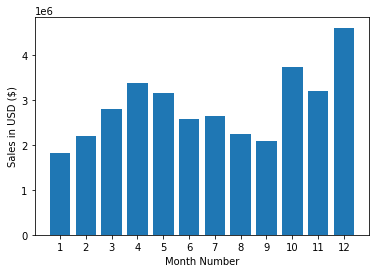

In [78]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.show()

# What City Had the Highest Number of Sales?

In [103]:
City_results = all_data.groupby("City").sum()
City_results.sort_values(by='Sales', ascending=False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Seattle (WA),16553,2.733296e+06,104941,2.747755e+06
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06


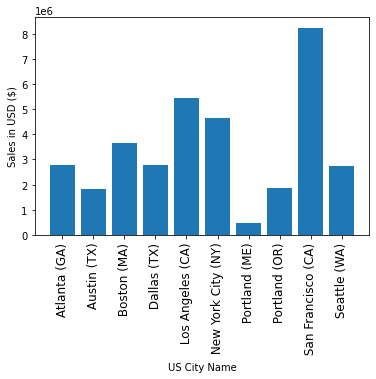

In [109]:
City = [city for city, df in all_data.groupby('City')]
plt.bar(City, City_results['Sales'])
plt.xticks(City, rotation = 'vertical', size = 12)
plt.xlabel('US City Name')
plt.ylabel('Sales in USD ($)')
plt.show()

# What Time should advertisements be displayed to maximize likelihood of customers buying the product?

In [15]:
all_data['New Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,New Order Date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-30 09:27:00


In [16]:
all_data['Hour'] = all_data['New Order Date'].dt.hour
all_data['Minute'] = all_data['New Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,New Order Date,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-30 09:27:00,9,27


<function matplotlib.pyplot.show(close=None, block=None)>

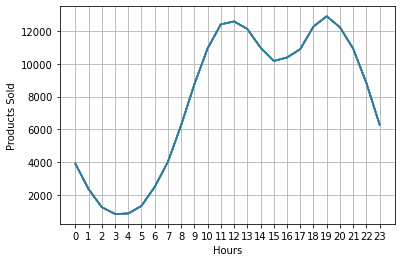

In [125]:
hours =[hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel('Products Sold')
plt.grid()
plt.show
# Chart below shows 12 pm (12) and 7pm (19) are the most optimal times for sales

# What Products are most often sold together?

In [28]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df =df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

<ipython-input-28-05e41b64d9b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [29]:
from itertools import combinations
from collections import Counter

In [38]:
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)


[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 120),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]

#  What product sold the most? 

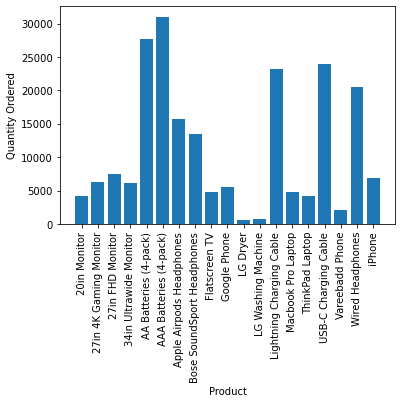

In [50]:
Products_Sold = all_data.groupby("Product")
quantity_ordered = Products_Sold.sum()['Quantity Ordered']
products = [products for products, df in Products_Sold]
plt.bar(products,quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 10)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

In [56]:
Products_Sold.sum().sort_values('Quantity Ordered', ascending=False)

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,647586
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,634442
Wired Headphones,20557,226395.18,133397,246478.43,271720,554023
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
iPhone,6849,4789400.00,47941,4794300.00,98657,201688


<ipython-input-70-3bdf8fdf69a4>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size =9)


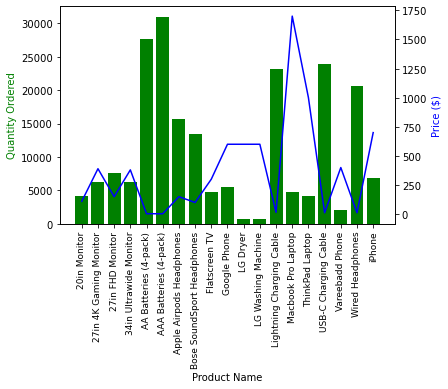

In [70]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2= ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation = 'vertical', size =9)

plt.show()